In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Load Dataset
df = pd.read_csv('/kaggle/input/chess-games-dataset-lichess-2017-may/games_metadata_profile.csv')
#Display Head
print(df.head())

   Unnamed: 0  GameID                                              Event  \
0           0       1                               Rated Classical game   
1           1       2                                  Rated Bullet game   
2           2       3  Rated Classical tournament https://lichess.org...   
3           3       4                               Rated Classical game   
4           4       5                                   Rated Blitz game   

                           Site        Date      Time       White  WhiteElo  \
0  https://lichess.org/thHVpOWb  2017.04.30  22:00:22    laserany      1462   
1  https://lichess.org/VkrZh2mi  2017.04.30  22:00:27     aezr777      1384   
2  https://lichess.org/SBQLVdig  2017.04.30  22:01:00   Parapixel      1895   
3  https://lichess.org/eKevl4x2  2017.04.30  22:01:02   ByWitcher      1511   
4  https://lichess.org/jFT4MHsZ  2017.04.30  22:01:18  Phililipov      1886   

   WhiteRatingDiff  White_is_deleted  ...  Black_createdAt  \
0     

In [52]:
moves_list = df['Moves'].tolist()

def extract_first_10_moves(moves_str):
    # Splitting by spaces to get individual moves/notations
    moves = moves_str.split()
    # Filtering out the evaluations and clock times, keeping only the actual moves
    pure_moves = [move for move in moves if move[0].isalpha() and not move.startswith('{')]
    # Returning the first 10 moves
    return pure_moves[:10]

# Applying the function to each game's moves
first_10_moves = [extract_first_10_moves(moves) for moves in moves_list]

# For demonstration, let's see the first 5 games' first 10 moves
first_10_moves[:5]

[['e4', 'e5', 'Nf3', 'Nc6', 'Bb5', 'Nd4', 'a4?!', 'Nxb5?!', 'axb5', 'd6'],
 ['e4', 'd5', 'd4?', 'dxe4', 'Nc3', 'Bf5', 'Nge2', 'Nf6', 'Ng3', 'Bg6'],
 ['e4', 'c5', 'Nf3', 'g6', 'Bc4', 'Bg7', 'Nc3', 'd6', 'd3', 'Nf6'],
 ['e4', 'e5', 'Nf3', 'f6?!', 'Bb5', 'g6', 'd4', 'c6?!', 'Bc4?!', 'b5?!'],
 ['e4', 'd6', 'd4', 'Nf6', 'Bd3', 'e5', 'c3', 'd5', 'exd5?!', 'Qxd5']]

In [53]:
#Binary Target Variable
# Assuming 'Result' column is in your dataframe as df['Result']
df['Win'] = df['Result'].apply(lambda x: 1 if x == '1-0' else 0 if x == '0-1' else None)

# Drop rows where result is a draw, as we're focusing on wins/losses
df = df.dropna(subset=['Win'])

In [54]:
#Decision Tree Algorithm:
# Create feature columns for King's Pawn and Queen's Pawn openings
df['Kings_Pawn'] = df['Moves'].apply(lambda x: 1 if 'e4' in x[:2] else 0)
df['Queens_Pawn'] = df['Moves'].apply(lambda x: 1 if 'd4' in x[:2] else 0)
# Alapin’s Opening
df['Alapins_Opening'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Ne2') else 0)
# Bishop’s Opening
df['Bishops_Opening'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Bc4') else 0)
# Damiano Defense
df['Damiano_Defense'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 f6') else 0)
# Danish Gambit
df['Danish_Gambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.d4 exd4 3.c3 dxc3 4.Bc4') else 0)
# Evans Gambit
df['Evans_Gambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.Bc4 Bc5 4.b4') else 0)
# Elephant Gambit
df['Elephant_Gambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 d5') else 0)
# Falkbeer Counter-Gambit
df['Falkbeer_CounterGambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.f4 d5') else 0)
# Four Knights Game
df['Four_Knights_Game'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.Nc3 Nf6') else 0)
# Giuoco Piano
df['Giuoco_Piano'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.Bc4 Bc5') else 0)
# Göring Gambit
df['Goring_Gambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.d4 exd4 4.c3') else 0)
# Greco Counter Gambit
df['Greco_Counter_Gambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 f5') else 0)
# Hungarian Defense
df['Hungarian_Defense'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.Bc4 Be7') else 0)
# King’s Gambit
df['Kings_Gambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.f4') else 0)
# Petroff Defense
df['Petroff_Defense'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nf6') else 0)
# Philidor Defense
df['Philidor_Defense'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 d6') else 0)
# Queen’s Pawn Counter-Gambit
df['Queens_Pawn_CounterGambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 d5') else 0)
# Ruy López
df['Ruy_Lopez'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.Bb5') else 0)
# Scandinavian Defense
df['Scandinavian_Defense'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 d5') else 0)
# Scotch Gambit
df['Scotch_Gambit'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.d4 exd4 4.Bc4') else 0)
# Scotch Game
df['Scotch_Game'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.d4 exd4 4.Nxd4') else 0)
# Three Knights Game
df['Three_Knights_Game'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.Nc3 Bb4') else 0)
# Two Knights Defense
df['Two_Knights_Defense'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nf3 Nc6 3.Bc4 Nf6') else 0)
# Vienna Game
df['Vienna_Game'] = df['Moves'].apply(lambda x: 1 if x.startswith('1.e4 e5 2.Nc3') else 0)

In [55]:
#Split the Data
from sklearn.model_selection import train_test_split

# Ensure all opening features are included in X
feature_columns = [
    'Kings_Pawn', 'Queens_Pawn', 'Alapins_Opening', 'Bishops_Opening', 'Damiano_Defense',
    'Danish_Gambit', 'Evans_Gambit', 'Elephant_Gambit', 'Falkbeer_CounterGambit',
    'Four_Knights_Game', 'Giuoco_Piano', 'Goring_Gambit', 'Greco_Counter_Gambit',
    'Hungarian_Defense', 'Kings_Gambit', 'Petroff_Defense', 'Philidor_Defense',
    'Queens_Pawn_CounterGambit', 'Ruy_Lopez', 'Scandinavian_Defense', 'Scotch_Gambit',
    'Scotch_Game', 'Three_Knights_Game', 'Two_Knights_Defense', 'Vienna_Game'
]

# Define X with all opening features and y as the target
X = df[feature_columns]
y = df['Win']  # Assuming 'Win' is a binary column indicating whether the player won or not

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
y_pred = clf.predict(X_test)

In [58]:
#Evaluate Model
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

Accuracy of the Decision Tree model: 0.51


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))


Accuracy: 0.5130044241855477
Precision: 0.5130044241855477
Recall: 1.0
F1 Score: 0.6781267998759472


In [60]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                           importance
Queens_Pawn                  0.999996
Kings_Pawn                   0.000004
Hungarian_Defense            0.000000
Two_Knights_Defense          0.000000
Three_Knights_Game           0.000000
Scotch_Game                  0.000000
Scotch_Gambit                0.000000
Scandinavian_Defense         0.000000
Ruy_Lopez                    0.000000
Queens_Pawn_CounterGambit    0.000000
Philidor_Defense             0.000000
Petroff_Defense              0.000000
Kings_Gambit                 0.000000
Greco_Counter_Gambit         0.000000
Goring_Gambit                0.000000
Giuoco_Piano                 0.000000
Four_Knights_Game            0.000000
Falkbeer_CounterGambit       0.000000
Elephant_Gambit              0.000000
Evans_Gambit                 0.000000
Danish_Gambit                0.000000
Damiano_Defense              0.000000
Bishops_Opening              0.000000
Alapins_Opening              0.000000
Vienna_Game                  0.000000


In [61]:
print(df['Moves'].head())

0    e4 {[%eval 0.18] [%clk 0:10:00]} e5 {[%eval 0....
1    e4 {[%eval 0.15] [%clk 0:01:00]} d5 {[%eval 0....
2    e4 {[%eval 0.18] [%clk 0:10:00]} c5 {[%eval 0....
3    e4 {[%eval 0.25] [%clk 0:10:00]} e5 {[%eval 0....
4    e4 {[%eval 0.24] [%clk 0:03:00]} d6 {[%eval 0....
Name: Moves, dtype: object


In [62]:
import re

# Function to clean annotations from moves
def clean_moves(moves):
    # Remove annotations
    clean_moves = re.sub(r'\s*{\[%eval.*?\] \[%clk.*?\]}\s*', ' ', moves)
    return clean_moves.strip()

# Apply the clean_moves function to each row in the 'moves' column
df['cleaned_moves'] = df['Moves'].apply(clean_moves)

In [63]:
# Adjust the definition for openings to account for the cleaned moves
df['Kings_Pawn'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4') else 0)
df['Queens_Pawn'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('d4') else 0)
df['Alapins_Opening'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Ne2') else 0)
df['Bishops_Opening'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Bc4') else 0)
df['Damiano_Defense'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 f6') else 0)
df['Danish_Gambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 d4 exd4 c3 dxc3 Bc4') else 0)
df['Evans_Gambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 Bc4 Bc5 b4') else 0)
df['Elephant_Gambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 d5') else 0)
df['Falkbeer_CounterGambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 f4 d5') else 0)
df['Four_Knights_Game'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 Nc3 Nf6') else 0)
df['Giuoco_Piano'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 Bc4 Bc5') else 0)
df['Goring_Gambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 d4 exd4 c3') else 0)
df['Greco_Counter_Gambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 f5') else 0)
df['Hungarian_Defense'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 Bc4 Be7') else 0)
df['Kings_Gambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 f4') else 0)
df['Petroff_Defense'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nf6') else 0)
df['Philidor_Defense'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 d6') else 0)
df['Queens_Pawn_CounterGambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 d5') else 0)
df['Ruy_Lopez'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 Bb5') else 0)
df['Scandinavian_Defense'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 d5') else 0)
df['Scotch_Gambit'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 d4 exd4 Bc4') else 0)
df['Scotch_Game'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 d4 exd4 Nxd4') else 0)
df['Three_Knights_Game'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 Nc3 Bb4') else 0)
df['Two_Knights_Defense'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nf3 Nc6 Bc4 Nf6') else 0)
df['Vienna_Game'] = df['Moves'].apply(lambda x: 1 if clean_moves(x).startswith('e4 e5 Nc3') else 0)

In [64]:
y_pred = clf.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))


Accuracy: 0.5130044241855477
Precision: 0.5130044241855477
Recall: 1.0
F1 Score: 0.6781267998759472


In [66]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                           importance
Queens_Pawn                  0.999996
Kings_Pawn                   0.000004
Hungarian_Defense            0.000000
Two_Knights_Defense          0.000000
Three_Knights_Game           0.000000
Scotch_Game                  0.000000
Scotch_Gambit                0.000000
Scandinavian_Defense         0.000000
Ruy_Lopez                    0.000000
Queens_Pawn_CounterGambit    0.000000
Philidor_Defense             0.000000
Petroff_Defense              0.000000
Kings_Gambit                 0.000000
Greco_Counter_Gambit         0.000000
Goring_Gambit                0.000000
Giuoco_Piano                 0.000000
Four_Knights_Game            0.000000
Falkbeer_CounterGambit       0.000000
Elephant_Gambit              0.000000
Evans_Gambit                 0.000000
Danish_Gambit                0.000000
Damiano_Defense              0.000000
Bishops_Opening              0.000000
Alapins_Opening              0.000000
Vienna_Game                  0.000000


In [68]:
print(df[['Moves', 'cleaned_moves']].head())

                                               Moves  \
0  e4 {[%eval 0.18] [%clk 0:10:00]} e5 {[%eval 0....   
1  e4 {[%eval 0.15] [%clk 0:01:00]} d5 {[%eval 0....   
2  e4 {[%eval 0.18] [%clk 0:10:00]} c5 {[%eval 0....   
3  e4 {[%eval 0.25] [%clk 0:10:00]} e5 {[%eval 0....   
4  e4 {[%eval 0.24] [%clk 0:03:00]} d6 {[%eval 0....   

                                       cleaned_moves  
0  e4 e5 Nf3 Nc6 Bb5 Nd4 a4?! Nxb5?! axb5 d6 Ra3?...  
1  e4 d5 d4? dxe4 Nc3 Bf5 Nge2 Nf6 Ng3 Bg6 Be2?! ...  
2  e4 c5 Nf3 g6 Bc4 Bg7 Nc3 d6 d3 Nf6 Be3 O-O h3 ...  
3  e4 e5 Nf3 f6?! Bb5 g6 d4 c6?! Bc4?! b5?! Bb3 d...  
4  e4 d6 d4 Nf6 Bd3 e5 c3 d5 exd5?! Qxd5 dxe5 Qxg...  


In [70]:
from collections import Counter

def most_common_moves(df, column_name='cleaned_moves', top_n=10):
    """
    Identifies the most common sequences of moves in a chess dataset.
    
    :param df: Pandas DataFrame containing the chess game data.
    :param column_name: Name of the column containing the sequences of moves.
    :param top_n: Number of most common sequences to return.
    :return: A list of tuples containing the most common sequences and their counts.
    """
    # Count the frequency of each unique sequence of moves
    move_counts = Counter(df[column_name])
    
    # Identify and return the top_n most common sequences
    most_common = move_counts.most_common(top_n)
    
    return most_common


In [71]:
most_common_sequences = most_common_moves(df, 'cleaned_moves', 10)
print(most_common_sequences)


[('d4 d5 c4 e5 dxe5 d4 e3?! Bb4+ Bd2 dxe3 Bxb4?? exf2+ Ke2 fxg1=N+ Rxg1?? Bg4+', 2), ('e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5? Nxf7 Kxf7 Qf3+ Kg8?? Bxd5+', 2), ('e4 e5 Nf3 Nc6 Bb5 Nd4 a4?! Nxb5?! axb5 d6 Ra3?! Nf6 Nc3? Bd7? Rb3?! c6 bxc6 Bxc6 d3 b6?! Bg5 Be7 O-O O-O d4?! exd4? Nxd4 Qc8 h3 Nxe4?? Bxe7 Re8 Nxe4? Rxe7?? Nxd6 Qd8?? Nxc6', 1), ('e4 d5 d4? dxe4 Nc3 Bf5 Nge2 Nf6 Ng3 Bg6 Be2?! Nbd7 Ncxe4? Nxe4 Nxe4 Bxe4 O-O Bg6 Bd2 e6 c3 Bd6 b3 O-O c4 c6 Bc3 e5 d5 cxd5?! Qxd5 Qf6?? Qxb7?? Nc5 Qf3 Qe7 Rfd1 e4?! Qh3?! Nd3 Bxd3 exd3 Re1 Qc7 Rad1 Rfe8 Rxe8+? Rxe8 g3?!', 1), ('e4 c5 Nf3 g6 Bc4 Bg7 Nc3 d6 d3 Nf6 Be3 O-O h3 Nc6 Qd2 Nd7 Bh6 Nde5 Nxe5 Nxe5 Bb3 a6 a4 b6 O-O Bb7 Bxg7 Kxg7 f4 Nc6 Qf2?! Nd4 Bd5 Rb8 f5 e6 f6+ Kh8 Bxb7 Rxb7 Ne2? Nxc2 Rac1 Nb4 Nf4? e5 Ne2? Nxd3 Qh4 Nxc1 Nxc1?! Rg8 Ne2 g5? Qh6?! Qf8? Qh5 Rg6 Ng3 Qh6?! Qg4 Rb8? Nh5? Qf8 Rf5 h6 Ng3 Kh7 Nf1 Qe8 Ng3? Qxa4 h4?? Rbg8?? h5 Qa1+? Rf1 Qxb2 hxg6+ Rxg6 Nh5? a5? Qd7 Qd4+? Kh1? Qc4 Kg1 a4 Qxd6? Qxe4? Qc7? Qd4+?! Kh1? Qh4+? Kg1 Qxh5?? Qxf7+

In [76]:
import pandas as pd
from collections import defaultdict

def extract_first_5_moves(moves):
    """Extracts and returns the first 5 moves of a game."""
    moves_list = moves.split()
    return ' '.join(moves_list[:10])  # 5 moves for each player

def calculate_win_rates(df):
    """Calculates win rates for each 5-move combination."""
    # Extract the first 5 moves for each game
    df['first_5_moves'] = df['cleaned_moves'].apply(extract_first_5_moves)
    
    # Initialize a dictionary to hold win counts, loss counts, and total counts for each combination
    win_rates = defaultdict(lambda: {'wins': 0, 'losses': 0, 'draws': 0, 'total': 0})
    
    # Iterate over the DataFrame to populate the dictionary
    for index, row in df.iterrows():
        combination = row['first_5_moves']
        result = row['Result']
        
        # Update counts
        win_rates[combination]['total'] += 1
        if result == "1-0":  # Assuming a win for White
            win_rates[combination]['wins'] += 1
        elif result == "0-1":  # Assuming a win for Black
            win_rates[combination]['losses'] += 1
        elif result == "1/2-1/2":  # Assuming a draw
            win_rates[combination]['draws'] += 1

    # Calculate win rate for each combination
    for combination, stats in win_rates.items():
        wins = stats['wins']
        total = stats['total']
        win_rates[combination]['win_rate'] = wins / total if total > 0 else 0

    # Find the combination with the highest win rate
    highest_win_rate_combination = max(win_rates.items(), key=lambda x: x[1]['win_rate'])

    return highest_win_rate_combination

# Assuming df is your DataFrame and it has a 'Result' column
# highest_win_rate_combination = calculate_win_rates(df)
# Call the function with your DataFrame
highest_win_rate_combination = calculate_win_rates(df)

# Then print the results
print(f"Combination with the highest win rate: {highest_win_rate_combination[0]}")
print(f"Win rate: {highest_win_rate_combination[1]['win_rate']:.2f}, Total games: {highest_win_rate_combination[1]['total']}")



Combination with the highest win rate: e4 e5 Nf3 Nc6 Bb5 Nd4 a4?! Nxb5?! axb5 d6
Win rate: 1.00, Total games: 1


In [78]:
import re

# Assuming df is your DataFrame and it has a column named 'Moves'

# Function to remove annotations from moves
def clean_moves(moves):
    # Remove annotations
    clean_moves = re.sub(r'\s*{\[%eval.*?\] \[%clk.*?\]}\s*', ' ', moves)
    return clean_moves.strip()

# Function to separate the moves into white and black
def separate_moves(moves):
    move_list = moves.split()
    white_moves = ' '.join(move_list[::2])  # Takes every odd move, starting at index 0
    black_moves = ' '.join(move_list[1::2])  # Takes every even move, starting at index 1
    return white_moves, black_moves

# First, clean the 'Moves' column to remove annotations
df['cleaned_moves'] = df['Moves'].apply(clean_moves)

# Then, separate the cleaned moves into white and black
df['white_moves_cleaned'], df['black_moves_cleaned'] = zip(*df['cleaned_moves'].apply(separate_moves))

# Check the first few rows to verify the cleaned and separated moves
df[['white_moves_cleaned', 'black_moves_cleaned']].head()



,white_moves_cleaned,black_moves_cleaned
0,e4 Nf3 Bb5 a4?! axb5 Ra3?! Nc3? Rb3?! bxc6 d3 ...,e5 Nc6 Nd4 Nxb5?! d6 Nf6 Bd7? c6 Bxc6 b6?! Be7...
1,e4 d4? Nc3 Nge2 Ng3 Be2?! Ncxe4? Nxe4 O-O Bd2 ...,d5 dxe4 Bf5 Nf6 Bg6 Nbd7 Nxe4 Bxe4 Bg6 e6 Bd6 ...
2,e4 Nf3 Bc4 Nc3 d3 Be3 h3 Qd2 Bh6 Nxe5 Bb3 a4 O...,c5 g6 Bg7 d6 Nf6 O-O Nc6 Nd7 Nde5 Nxe5 a6 b6 B...
3,e4 Nf3 Bb5 d4 Bc4?! Bb3 dxe5 Bg5? h4 Be3 Nc3?!...,e5 f6?! g6 c6?! b5?! d6 fxe5?! Be7 h6 Bg4?! Nf...
4,e4 d4 Bd3 c3 exd5?! dxe5 Qf3 Nxf3 Be3 Bf4 Bc2 ...,d6 Nf6 e5 d5 Qxd5 Qxg2 Qxf3 Nfd7 Nc6 Nc5 Bg4 N...


In [81]:
import pandas as pd
from collections import defaultdict

def analyze_moves(df, column_name):
    # Initialize counters for move sequences
    move_counts = defaultdict(int)
    win_counts = defaultdict(lambda: {'wins': 0, 'total': 0})

    # Iterate through the DataFrame
    for index, row in df.iterrows():
        moves = row[column_name].split()
        # Consider only games with at least 5 moves
        if len(moves) >= 3:
            first_five_moves = ' '.join(moves[:3])
            move_counts[first_five_moves] += 1
            win_counts[first_five_moves]['total'] += 1
            # Update win counts based on game result
            if row['Result'] == '1-0' and column_name == 'white_moves_cleaned':
                win_counts[first_five_moves]['wins'] += 1
            elif row['Result'] == '0-1' and column_name == 'black_moves_cleaned':
                win_counts[first_five_moves]['wins'] += 1

    # Determine the most common 5-move start
    most_common_start = max(move_counts, key=move_counts.get)

    # Calculate the highest win rate
    highest_win_rate = 0
    highest_win_rate_start = ''
    for moves, counts in win_counts.items():
        win_rate = counts['wins'] / counts['total'] if counts['total'] > 0 else 0
        if win_rate > highest_win_rate:
            highest_win_rate = win_rate
            highest_win_rate_start = moves

    return {
        'most_common_start': most_common_start,
        'most_common_start_count': move_counts[most_common_start],
        'highest_win_rate_start': highest_win_rate_start,
        'highest_win_rate': highest_win_rate,
        'highest_win_rate_total_games': win_counts[highest_win_rate_start]['total']
    }

results_white = analyze_moves(df, 'white_moves_cleaned')
print("White Moves Analysis:")
print(f"Most common start: {results_white['most_common_start']} (Count: {results_white['most_common_start_count']})")
print(f"Highest win rate start: {results_white['highest_win_rate_start']} (Win rate: {results_white['highest_win_rate']:.2f}, Total games: {results_white['highest_win_rate_total_games']})")

# For black moves, use 'black_moves_cleaned' instead of 'white_moves_cleaned'.


White Moves Analysis:
Most common start: e4 Nf3 d4 (Count: 5411)
Highest win rate start: e4 f3? Nc3? (Win rate: 1.00, Total games: 1)


In [82]:
import pandas as pd
from collections import defaultdict

def analyze_moves(df, column_name):
    # Initialize counters for move sequences
    move_counts = defaultdict(int)
    win_counts = defaultdict(lambda: {'wins': 0, 'total': 0})

    # Iterate through the DataFrame
    for index, row in df.iterrows():
        moves = row[column_name].split()
        # Consider only games with at least 5 moves
        if len(moves) >= 3:
            first_five_moves = ' '.join(moves[:3])
            move_counts[first_five_moves] += 1
            win_counts[first_five_moves]['total'] += 1
            # Update win counts based on game result
            if row['Result'] == '1-0' and column_name == 'black_moves_cleaned':
                win_counts[first_five_moves]['wins'] += 1
            elif row['Result'] == '0-1' and column_name == 'white_moves_cleaned':
                win_counts[first_five_moves]['wins'] += 1

    # Determine the most common 5-move start
    most_common_start = max(move_counts, key=move_counts.get)

    # Calculate the highest win rate
    highest_win_rate = 0
    highest_win_rate_start = ''
    for moves, counts in win_counts.items():
        win_rate = counts['wins'] / counts['total'] if counts['total'] > 0 else 0
        if win_rate > highest_win_rate:
            highest_win_rate = win_rate
            highest_win_rate_start = moves

    return {
        'most_common_start': most_common_start,
        'most_common_start_count': move_counts[most_common_start],
        'highest_win_rate_start': highest_win_rate_start,
        'highest_win_rate': highest_win_rate,
        'highest_win_rate_total_games': win_counts[highest_win_rate_start]['total']
    }


results_white = analyze_moves(df, 'black_moves_cleaned')
print("Black Moves Analysis:")
print(f"Most common start: {results_white['most_common_start']} (Count: {results_white['most_common_start_count']})")
print(f"Highest win rate start: {results_white['highest_win_rate_start']} (Win rate: {results_white['highest_win_rate']:.2f}, Total games: {results_white['highest_win_rate_total_games']})")

#'black_moves_cleaned'


Black Moves Analysis:
Most common start: e5 Nc6 Nf6 (Count: 2849)
Highest win rate start: e5 f6?! g6 (Win rate: 1.00, Total games: 3)


Now that we've seen that the Highest win rate for both white and black, lets move onto the interactions for both

In [83]:
def analyze_counters(df, opening_moves_col, response_moves_col, result_col):
    # Initialize data structure to hold counts and outcomes
    counters_data = defaultdict(lambda: defaultdict(lambda: {'wins': 0, 'losses': 0, 'draws': 0, 'total': 0}))
    
    # Iterate over the DataFrame to populate counters_data
    for _, row in df.iterrows():
        opening_move = row[opening_moves_col].split()[0] if row[opening_moves_col].split() else None
        response_move = row[response_moves_col].split()[0] if row[response_moves_col].split() else None
        result = row[result_col]
        
        if opening_move and response_move:
            counters_data[opening_move][response_move]['total'] += 1
            if result == '1-0' and opening_moves_col == 'white_moves_cleaned':
                counters_data[opening_move][response_move]['wins'] += 1
            elif result == '0-1' and opening_moves_col == 'black_moves_cleaned':
                counters_data[opening_move][response_move]['wins'] += 1
            elif result == '1/2-1/2':
                counters_data[opening_move][response_move]['draws'] += 1
            else:
                counters_data[opening_move][response_move]['losses'] += 1

    # Analyze best counters based on win rates
    best_counters = {}
    for opening_move, responses in counters_data.items():
        best_response = None
        best_win_rate = -1
        for response, outcomes in responses.items():
            win_rate = outcomes['wins'] / outcomes['total'] if outcomes['total'] > 0 else 0
            if win_rate > best_win_rate:
                best_win_rate = win_rate
                best_response = response
        best_counters[opening_move] = {'response': best_response, 'win_rate': best_win_rate}
    
    return best_counters

# Example usage:
best_white_counters = analyze_counters(df, 'white_moves_cleaned', 'black_moves_cleaned', 'Result')
best_black_counters = analyze_counters(df, 'black_moves_cleaned', 'white_moves_cleaned', 'Result')

# You can then print or explore best_white_counters and best_black_counters to see the recommended counters.


In [90]:
print(best_white_counters)
print(best_black_counters)

{'e4': {'response': 'h5', 'win_rate': 1.0}, 'c4': {'response': 'h5?!', 'win_rate': 1.0}, 'd4': {'response': 'Nc6?!', 'win_rate': 1.0}, 'Nf3': {'response': 'b6?!', 'win_rate': 1.0}, 'e3': {'response': 'Nh6?!', 'win_rate': 1.0}, 'b3': {'response': 'c5?!', 'win_rate': 1.0}, 'g4?!': {'response': '{[%eval', 'win_rate': 1.0}, 'd3': {'response': 'b5?!', 'win_rate': 1.0}, 'b4?!': {'response': 'g5?!', 'win_rate': 1.0}, 'f4': {'response': '{[%eval', 'win_rate': 1.0}, 'Nc3': {'response': 'b6', 'win_rate': 1.0}, 'g3': {'response': 'a6?!', 'win_rate': 1.0}, 'h4?!': {'response': 'h5?!', 'win_rate': 1.0}, 'h4': {'response': 'h6', 'win_rate': 1.0}, 'b3?!': {'response': 'f6?!', 'win_rate': 1.0}, 'a3': {'response': 'b6?!', 'win_rate': 1.0}, 'c3': {'response': 'f5', 'win_rate': 1.0}, 'Nh3?!': {'response': 'd6?!', 'win_rate': 1.0}, 'g3?!': {'response': 'e6', 'win_rate': 1.0}, 'h3': {'response': 'g6?!', 'win_rate': 1.0}, 'f4?!': {'response': '{[%eval', 'win_rate': 1.0}, 'g4?': {'response': 'c5?!', 'win_rat

In [86]:
from collections import defaultdict

def analyze_counters_three_moves(df, opening_moves_col, response_moves_col, result_col):
    # Initialize data structure to hold counts and outcomes
    counters_data = defaultdict(lambda: defaultdict(lambda: {'wins': 0, 'losses': 0, 'draws': 0, 'total': 0}))
    
    # Iterate over the DataFrame to populate counters_data
    for _, row in df.iterrows():
        # Extract the first three moves if they exist, otherwise take as many as available
        opening_moves = ' '.join(row[opening_moves_col].split()[:3])
        response_moves = ' '.join(row[response_moves_col].split()[:3])
        result = row[result_col]
        
        if opening_moves and response_moves:
            counters_data[opening_moves][response_moves]['total'] += 1
            if result == '1-0' and opening_moves_col == 'white_moves_cleaned':
                counters_data[opening_moves][response_moves]['wins'] += 1
            elif result == '0-1' and opening_moves_col == 'black_moves_cleaned':
                counters_data[opening_moves][response_moves]['wins'] += 1
            elif result == '1/2-1/2':
                counters_data[opening_moves][response_moves]['draws'] += 1
            else:
                counters_data[opening_moves][response_moves]['losses'] += 1

    # Analyze best counters based on win rates
    best_counters = {}
    for opening_moves, responses in counters_data.items():
        best_response = None
        best_win_rate = -1
        for response, outcomes in responses.items():
            win_rate = outcomes['wins'] / outcomes['total'] if outcomes['total'] > 0 else 0
            if win_rate > best_win_rate:
                best_win_rate = win_rate
                best_response = response
        best_counters[opening_moves] = {'response': best_response, 'win_rate': best_win_rate}
    
    return best_counters

# Example usage
# For white:
best_counters_white_three_moves = analyze_counters_three_moves(df, 'white_moves_cleaned', 'black_moves_cleaned', 'Result')
# For black:
best_counters_black_three_moves = analyze_counters_three_moves(df, 'black_moves_cleaned', 'white_moves_cleaned', 'Result')


In [89]:
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  GameID                                              Event  \
0               0       1                               Rated Classical game   
1               1       2                                  Rated Bullet game   
2               2       3  Rated Classical tournament https://lichess.org...   
3               3       4                               Rated Classical game   
4               4       5                                   Rated Blitz game   
...           ...     ...                                                ...   
76552        4458    4459                                  Rated Bullet game   
76553        4459    4460                                   Rated Blitz game   
76554        4460    4461                                   Rated Blitz game   
76555        4461    4462                                  Rated Bullet game   
76556        4462    4463                                   Rated Blitz game   

         

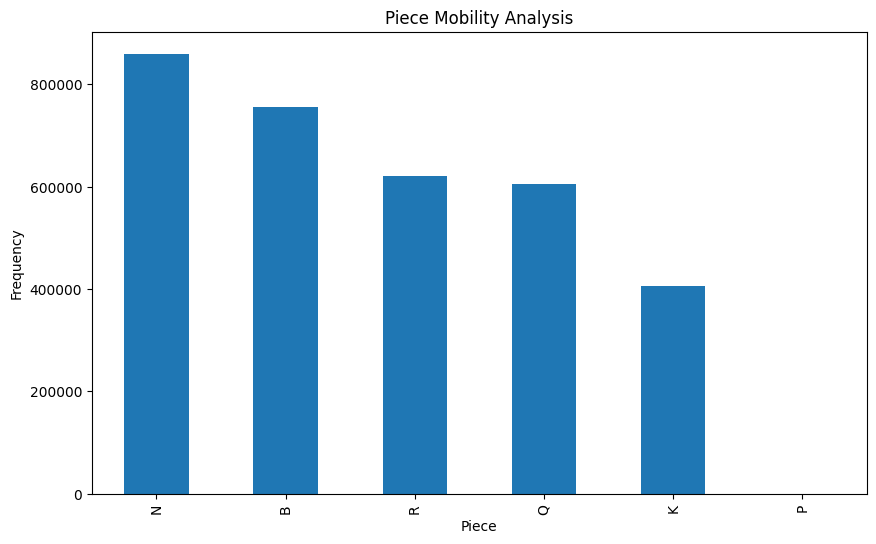

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Piece Mobility Analysis
# Extracting piece movements from the 'cleaned_moves' column
pieces = ['P', 'N', 'B', 'R', 'Q', 'K']  # Algebraic notations for each piece
piece_freq = {piece: [] for piece in pieces}

for moves in df['cleaned_moves']:
    for move in moves.split():
        piece = move[0]  # First character indicates the piece
        if piece in pieces:
            piece_freq[piece].append(move)

# Pad the shorter arrays with None to ensure equal lengths
max_len = max(len(moves) for moves in piece_freq.values())
for piece, moves in piece_freq.items():
    piece_freq[piece] += [None] * (max_len - len(moves))

# Convert the dictionary to a DataFrame
piece_freq_df = pd.DataFrame(piece_freq)

# Plotting piece movement frequencies
plt.figure(figsize=(10, 6))
piece_freq_df.count().sort_values(ascending=False).plot(kind='bar')
plt.title('Piece Mobility Analysis')
plt.xlabel('Piece')
plt.ylabel('Frequency')
plt.show()


/tmp/ipykernel_33/1646289030.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


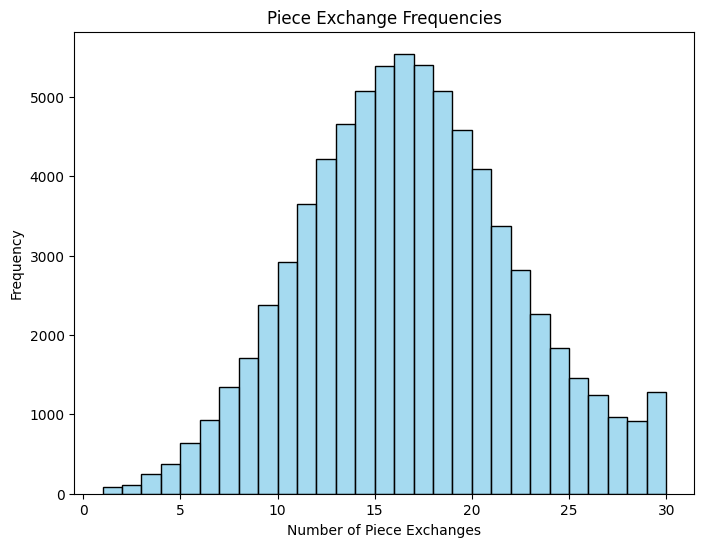

In [102]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# We'll create a new column 'piece_exchanges' to store the count of piece exchanges for each game
# Set use_inf_as_na globally
pd.set_option('mode.use_inf_as_na', True)
# Counting the number of commas (',') in the cleaned_moves and adding 1 to get the number of piece exchanges
df['piece_exchanges'] = df['cleaned_moves'].str.count('x') + 1

# Now, let's visualize the distribution of piece exchanges
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['piece_exchanges'], bins=range(df['piece_exchanges'].min(), df['piece_exchanges'].max() + 1), kde=False, color='skyblue')
plt.title('Piece Exchange Frequencies')
plt.xlabel('Number of Piece Exchanges')
plt.ylabel('Frequency')
plt.show()


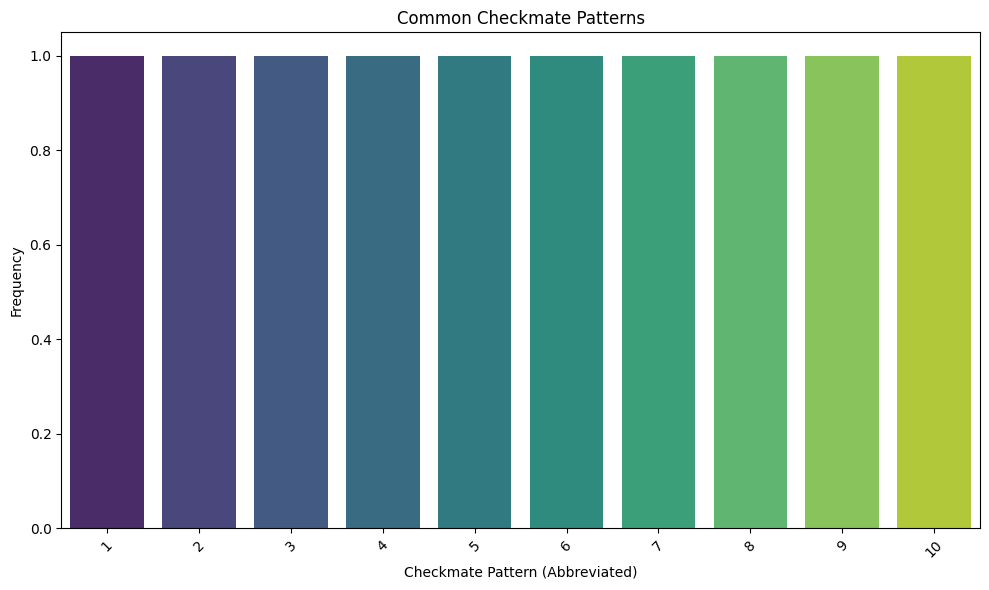

  Abbreviation                                  Checkmate Pattern
0            1  22]} d5 {[%eval 0.27]} e3 {[%eval 0.09]} Nf6 {...
1            2  08]} e6 {[%eval 0.15]} e4 {[%eval 0.11]} d5 {[...
2            3  14]} e5 {[%eval 0.3]} d4?! {[%eval -0.28]} Qh4...
3            4  04]} e6 {[%eval 0.19]} Nf3 {[%eval 0.02]} d5 {...
4            5  21]} g6 {[%eval 0.67]} e3 {[%eval 0.21]} Nf6 {...
5            6  25]} e5 {[%eval 0.36]} Bc4 {[%eval 0.04]} Nf6 ...
6            7  2]} d5 {[%eval 0.22]} c4 {[%eval 0.24]} c6 {[%...
7            8  14]} c6 {[%eval 0.39]} c3 {[%eval 0.17]} d5 {[...
8            9  25]} e5 {[%eval 0.32]} Nc3 {[%eval 0.12]} Nf6 ...
9           10  18]} c5 {[%eval 0.42]} c4 {[%eval 0.02]} e5 {[...


In [124]:
# Assuming you have a DataFrame named 'data' containing the dataset
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to identify checkmate patterns
def find_checkmate_pattern(moves):
    # Check if the last move ends with '#' indicating checkmate
    if moves[-1].endswith('#'):
        # Extract the checkmate pattern from the last few moves
        match = re.search(r'[0-9]+\.\s*(.*?)#', moves)
        if match:
            return match.group(1)
    return None

# Apply the function to create the checkmate_pattern column
df['checkmate_pattern'] = df['cleaned_moves'].apply(find_checkmate_pattern)

# Count the frequency of each checkmate pattern
checkmate_patterns = df['checkmate_pattern'].value_counts().head(10)

# Create a new column with abbreviated names
checkmate_patterns_df = pd.DataFrame({'Checkmate Pattern': checkmate_patterns.index, 'Frequency': checkmate_patterns.values})
checkmate_patterns_df['Abbreviation'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plotting common checkmate patterns with abbreviated names
plt.figure(figsize=(10, 6))
sns.barplot(x=checkmate_patterns_df['Abbreviation'], y=checkmate_patterns_df['Frequency'], palette='viridis')
plt.title('Common Checkmate Patterns')
plt.xlabel('Checkmate Pattern (Abbreviated)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display extended version of the checkmate pattern names in a table
print(checkmate_patterns_df[['Abbreviation', 'Checkmate Pattern']])


In [122]:
# Assuming you have a DataFrame named 'data' containing the dataset
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to identify checkmate patterns
def find_checkmate_pattern(moves):
    # Check if the last move ends with '#' indicating checkmate
    if moves[-1].endswith('#'):
        # Extract the checkmate pattern from the last few moves
        match = re.search(r'[0-9]+\.\s*(.*?)#', moves)
        if match:
            return match.group(1)
    return None

# Apply the function to create the checkmate_pattern column
df['checkmate_pattern'] = df['cleaned_moves'].apply(find_checkmate_pattern)

# Count the frequency of each checkmate pattern
checkmate_patterns = df['checkmate_pattern'].value_counts()

checkmate_patterns_df = checkmate_patterns.reset_index()
checkmate_patterns_df.columns = ['checkmate_pattern', 'count']

# Now, let's print the DataFrame to see the contents
print(checkmate_patterns_df)

                                     checkmate_pattern  count
0    22]} d5 {[%eval 0.27]} e3 {[%eval 0.09]} Nf6 {...      1
1    08]} e6 {[%eval 0.15]} e4 {[%eval 0.11]} d5 {[...      1
2    14]} e5 {[%eval 0.3]} d4?! {[%eval -0.28]} Qh4...      1
3    04]} e6 {[%eval 0.19]} Nf3 {[%eval 0.02]} d5 {...      1
4    21]} g6 {[%eval 0.67]} e3 {[%eval 0.21]} Nf6 {...      1
..                                                 ...    ...
105  04]} e5 {[%eval 0.15]} Nf3 {[%eval 0.08]} Nc6 ...      1
106  23]} e5 {[%eval 0.31]} Bc4 {[%eval 0.11]} Nf6 ...      1
107  12]} h5?! {[%eval 0.86]} d4 {[%eval 0.9]} Nf6 ...      1
108  19]} e5 {[%eval 0.2]} Nf3 {[%eval 0.2]} d6 {[%...      1
109  39]} g6 {[%eval 0.56]} d4 {[%eval 0.52]} Nf6 {...      1

[110 rows x 2 columns]


                                    Opening Sequence  Frequency
0  e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5? Nxf7 K...          2
1  d4 d5 c4 e5 dxe5 d4 e3?! Bb4+ Bd2 dxe3 Bxb4?? ...          2
2  e4 e5 Nf3 Nc6 Bb5 Nd4 a4?! Nxb5?! axb5 d6 Ra3?...          1
3  e4 e6 Nf3 c5 d4 cxd4 Nxd4 Nf6 Nc3 d6 g3 Be7 Bg...          1
4  e4 e6 Nc3 Nf6 Nf3 Ng4?! Bc4 Bc5?! O-O d5?! d4?...          1
5  g3 e5 Bg2 Nf6 e4 d6 Ne2 Be6 O-O Be7 f4 O-O f5 ...          1
6  e4 e5 Nf3 Nc6 Bc4 h6 d4 d6 dxe5 dxe5?! O-O? Qx...          1
7  e4 e5 Nf3 Nc6 d4 exd4 Nxd4 Nf6 Nc3 Bc5 Bg5?? N...          1
8  e4 c5 Nf3 Nc6 Bc4?! d6 d4 cxd4 Nxd4 Nxd4 Qxd4 ...          1
9  e4 e5 d4?! Nc6?! Nf3?! Nf6?! d5 Nd4? Bg5? d6? ...          1


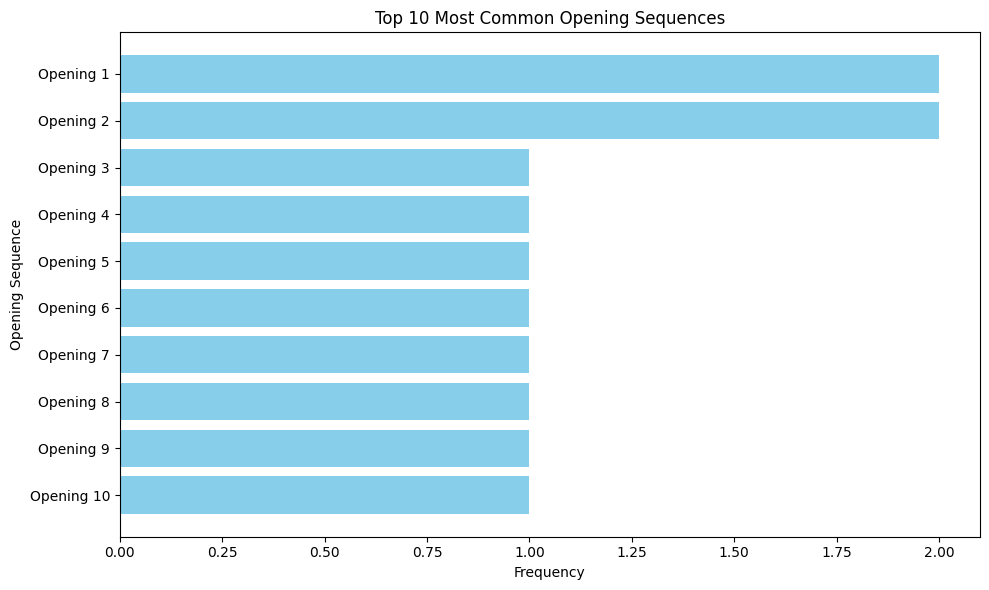

In [128]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Extracting the cleaned moves column
cleaned_moves = df['cleaned_moves']

# Counting the frequency of each unique opening sequence
opening_counts = cleaned_moves.value_counts().reset_index()
opening_counts.columns = ['Opening Sequence', 'Frequency']

# Displaying the most common opening sequences
print(opening_counts.head(10))

import matplotlib.pyplot as plt

# Assuming opening_counts contains the frequency of each unique opening sequence
# Sorting the opening counts by frequency in descending order
opening_counts_sorted = opening_counts.sort_values(by='Frequency', ascending=False)

# Selecting the top 10 most common opening sequences for visualization
top_10_openings = opening_counts_sorted.head(10)
opening_names = ['Opening 1', 'Opening 2', 'Opening 3', 'Opening 4', 'Opening 5',
                 'Opening 6', 'Opening 7', 'Opening 8', 'Opening 9', 'Opening 10']
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(opening_names , top_10_openings['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Opening Sequence')
plt.title('Top 10 Most Common Opening Sequences')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common opening at the top
plt.tight_layout()
plt.show()


Frequency of Encounters:
White
Evenflow          85
jalec             60
theonionknight    56
Nkko              55
esteban1961       54
manishdadwani     52
Sxakamanto        50
HardWoodPusher    49
ahmadraisj        47
gummibaer         44
Name: count, dtype: int64

Rating Distribution and Win Rate:
             Encounters  Average Rating  Win Rate
White                                            
-0olo0-               1          1775.0       0.0
-ArtanS-              1          1919.0       0.0
-chessnoob-           1          1671.0       0.0
0203                  2          1578.0       0.0
1--                   1          1384.0       0.0
1063314               1          1990.0       0.0
1169                  1          2005.0       0.0
143                   1          1780.0       0.0
1uke1                 1          1592.0       0.0
2007gabor             1          2053.0       0.0

Opening Preferences:
White
-0olo0-               (-0olo0-, Vienna Game: Falkbeer Variation)
-Arta

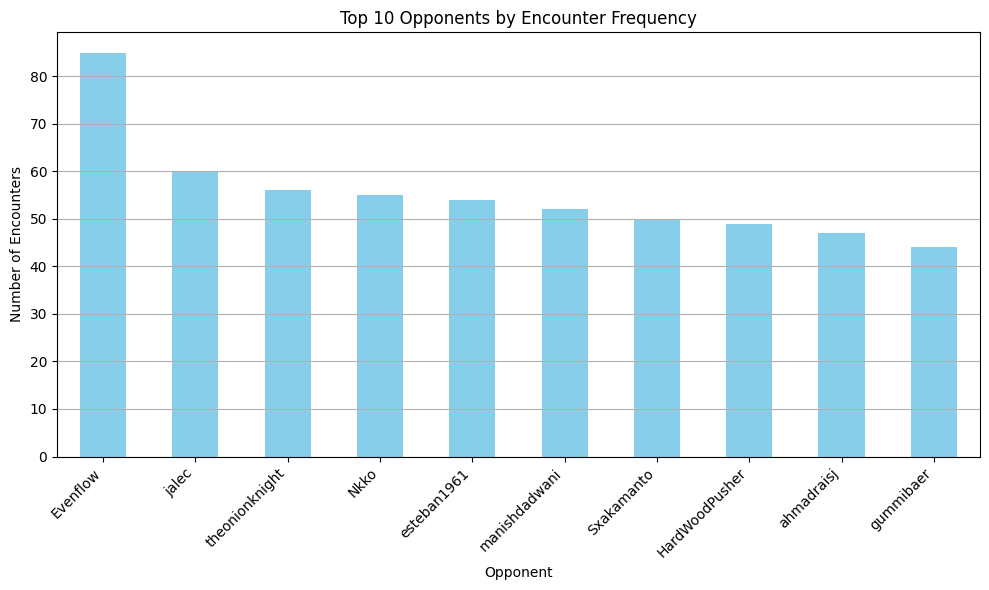

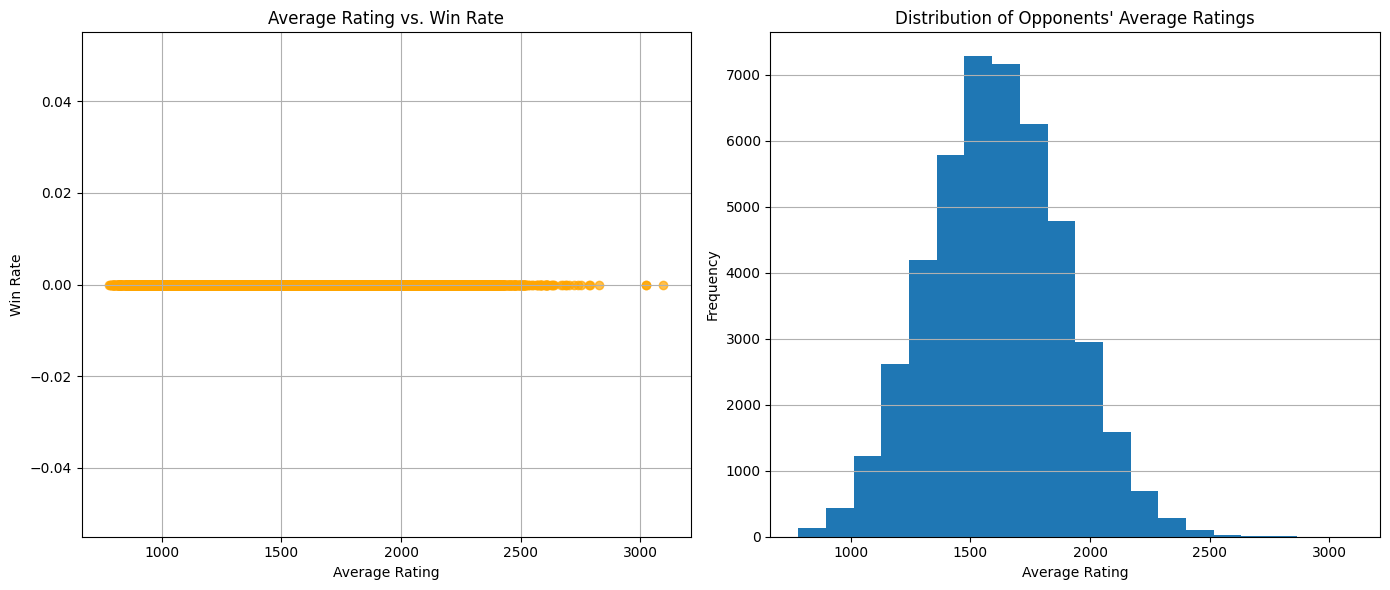

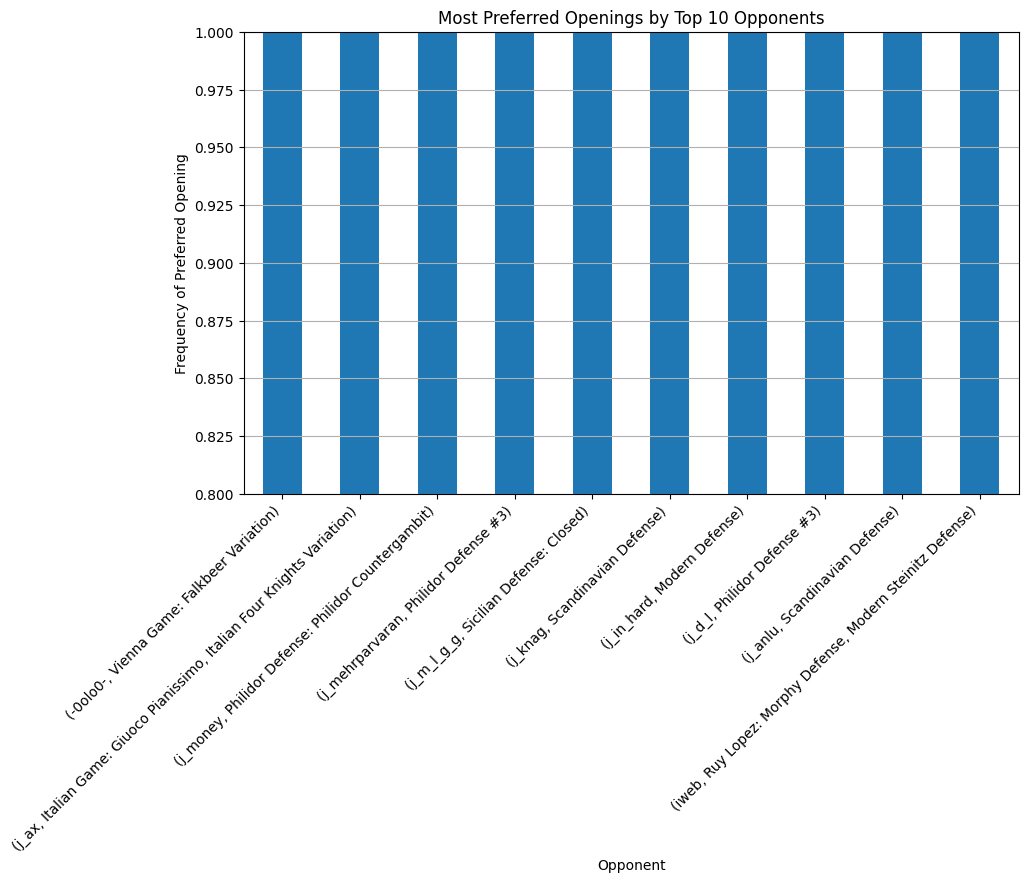

In [138]:
# Combine player names and opening moves
opponent_moves = pd.concat([df[['White', 'Opening']], df[['Black', 'Opening']].rename(columns={'Black':'White'})])

# 1. Frequency of Encounters
opponent_frequency = opponent_moves['White'].value_counts()

# 2. Rating Distribution and Win Rate
rating_win_data = df[['White', 'Black', 'Result', 'WhiteElo', 'BlackElo']].copy()  # Create a copy of the DataFrame
rating_win_data['Win'] = (rating_win_data['Result'] == 'win').astype(int)  # Assign values using .loc
opponent_stats = rating_win_data.groupby('White').agg({'Black': 'size', 'BlackElo': 'mean', 'Win': 'mean'})
opponent_stats.columns = ['Encounters', 'Average Rating', 'Win Rate']

# 3. Opening Preferences
opening_preferences = opponent_moves.groupby(['White', 'Opening']).size().groupby('White').idxmax()

# Displaying the results
print("Frequency of Encounters:")
print(opponent_frequency.head(10))
print("\nRating Distribution and Win Rate:")
print(opponent_stats.head(10))
print("\nOpening Preferences:")
print(opening_preferences.head(10))

import matplotlib.pyplot as plt

# Frequency of Encounters (Bar plot)
plt.figure(figsize=(10, 6))
opponent_frequency.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Opponents by Encounter Frequency')
plt.xlabel('Opponent')
plt.ylabel('Number of Encounters')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Rating Distribution and Win Rate (Scatter plot and Histogram)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(opponent_stats['Average Rating'], opponent_stats['Win Rate'], color='orange', alpha=0.7)
plt.title('Average Rating vs. Win Rate')
plt.xlabel('Average Rating')
plt.ylabel('Win Rate')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(opponent_stats['Average Rating'], bins=20)
plt.title('Distribution of Opponents\' Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Opening Preferences (Bar plot)
plt.figure(figsize=(10, 6))
opening_preferences.value_counts().head(10).plot(kind='bar')
plt.title('Most Preferred Openings by Top 10 Opponents')
plt.xlabel('Opponent')
plt.ylabel('Frequency of Preferred Opening')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)  # Adjust the y-axis range to emphasize differences
plt.grid(axis='y')